# PS2 Differentiation
### Yongfei Lu  (Jan. 14th, 2020)

## Problem 1

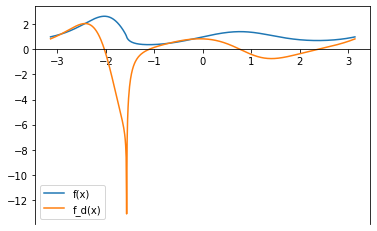

In [2]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt

# define f(x)
x = sy.symbols('x')
f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
f = sy.lambdify(x, f)
# sybomlic derivative
def f_d(X):
    def symbols():
        x = sy.symbols('x')
        f = (sy.sin(x) + 1)**(sy.sin(sy.cos(x)))
        f_d = sy.diff(f,x)
        return sy.lambdify(x, f_d)
    return symbols()(X)




# plot f(x) and its derivative
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

x_domain = np.arange(-np.pi, np.pi, 0.01)
ax.plot(x_domain, f(x_domain), label = "f(x)")
ax.plot(x_domain, f_d(x_domain), label = "f_d(x)")
ax.legend()
plt.show()

## Problem 2

In [2]:
# write the required functions
def forward_1(fn, x, h=0.01):
    return (fn(x + h) - fn(x))/h

def forward_2(fn, x, h=0.01):
    return (-3 * fn(x) + 4 * fn(x + h) - fn(x + 2 * h))/(2 * h)

def backward_1(fn, x, h=0.01):
    return (fn(x) - f(x - h))/h

def backward_2(fn, x, h=0.01):
    return (3 * fn(x) - 4 * fn(x - h) + fn(x - 2 * h)) / (2 * h)

def centered_2(fn, x, h=0.01):
    return (fn(x + h) - fn(x - h)) / (2 * h)

def centered_4(fn, x, h=0.01):
    return (fn(x - 2 * h) - 8 * fn(x - h) + 8 * fn(x + h) - fn(x + 2 * h))/ (12 * h)


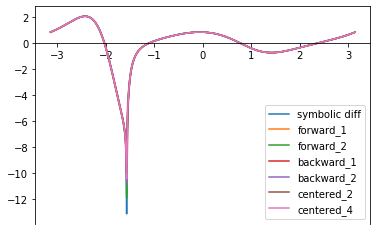

In [214]:

# plot the functions and compare with Problem 1

ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot(x_domain, f_d(x_domain), label = "symbolic diff")
ax.plot(x_domain, forward_1(f, x_domain), label = "forward_1")
ax.plot(x_domain, forward_2(f, x_domain), label = "forward_2")
ax.plot(x_domain, backward_1(f, x_domain), label = "backward_1")
ax.plot(x_domain, backward_2(f, x_domain), label = "backward_2")
ax.plot(x_domain, centered_2(f, x_domain), label = "centered_2")
ax.plot(x_domain, centered_4(f, x_domain), label = "centered_4")
ax.legend()

## Problem 3

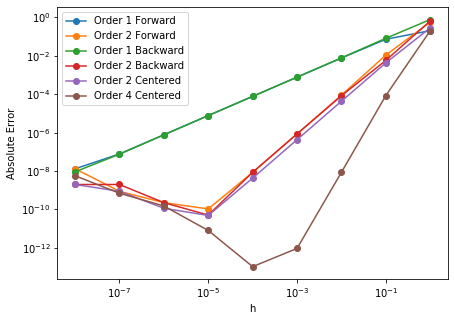

In [3]:
# plot 
def plt_abs_error(x):
    h_vals = np.logspace(-8, 0, 9)
    ax = plt.figure(figsize=(7,5)).gca()
    ax.loglog(h_vals, abs(forward_1(f, x, h_vals) - f_d(x)), label = "Order 1 Forward", marker='o')
    ax.loglog(h_vals, abs(forward_2(f, x, h_vals) - f_d(x)), label = "Order 2 Forward", marker='o')
    ax.loglog(h_vals, abs(backward_1(f, x, h_vals) - f_d(x)), label = "Order 1 Backward", marker='o')
    ax.loglog(h_vals, abs(backward_2(f, x, h_vals) - f_d(x)), label = "Order 2 Backward", marker='o')
    ax.loglog(h_vals, abs(centered_2(f, x, h_vals) - f_d(x)), label = "Order 2 Centered", marker='o')
    ax.loglog(h_vals, abs(centered_4(f, x, h_vals) - f_d(x)), label = "Order 4 Centered", marker='o')
    ax.legend()
    plt.xlabel('h')
    plt.ylabel('Absolute Error')

plt_abs_error(1)
    
    

## Problem 4

In [6]:
# load data
import pandas as pd
import os
os.chdir('/Users/luyongfei/Desktop/2020 Winter UChi/Perspective/PS2')
df = pd.DataFrame(np.load('plane.npy'), columns = ['t', 'alpha', 'beta'])
df

,t,alpha,beta
0,7.0,56.25,67.54
1,8.0,55.53,66.57
2,9.0,54.80,65.59
3,10.0,54.06,64.59
4,11.0,53.34,63.62
5,12.0,52.69,62.74
6,13.0,51.94,61.72
7,14.0,51.28,60.82


In [7]:
# convert alpha and beta to radians
df.alpha = np.deg2rad(df.alpha)
df.beta = np.deg2rad(df.beta)
df

,t,alpha,beta
0,7.0,0.981748,1.178795
1,8.0,0.969181,1.161866
2,9.0,0.956440,1.144761
3,10.0,0.943525,1.127308
4,11.0,0.930959,1.110378
5,12.0,0.919614,1.095020
6,13.0,0.906524,1.077217
7,14.0,0.895005,1.061509


In [8]:
# compute the coordinates
a = 500
df['x(t)'] = a * np.tan(df.beta) / (np.tan(df.beta) - np.tan(df.alpha))
df['y(t)'] = a * np.tan(df.beta) * np.tan(df.alpha) / (np.tan(df.beta) - np.tan(df.alpha))
df

,t,alpha,beta,x(t),y(t)
0,7.0,0.981748,1.178795,1311.271337,1962.456239
1,8.0,0.969181,1.161866,1355.936476,1975.114505
2,9.0,0.956440,1.144761,1401.918398,1987.346016
3,10.0,0.943525,1.127308,1450.497006,2000.840713
4,11.0,0.930959,1.110378,1498.640350,2013.512411
5,12.0,0.919614,1.095020,1543.798955,2025.792234
6,13.0,0.906524,1.077217,1598.041382,2040.990583
7,14.0,0.895005,1.061509,1647.596093,2055.065571


In [10]:
df['x(t)'][7]

1647.5960929059431

In [11]:
# calculate the derivative of x(t) and y(t)
df['x_d(t)'] = 0
df['y_d(t)'] = 0
# t = 7: forward difference quotient
df['x_d(t)'][0] = df['x(t)'][1] - df['x(t)'][0]
df['y_d(t)'][0] = df['y(t)'][1] - df['y(t)'][0]
# t = 14: backward difference quotient
df['x_d(t)'][7] = df['x(t)'][7] - df['x(t)'][6]
df['y_d(t)'][7] = df['y(t)'][7] - df['y(t)'][6]
# otherwise: centered difference quotient
for t in range(1, 7):
    df['x_d(t)'][t] = (df['x(t)'][t+1] - df['x(t)'][t-1]) / 2
    df['y_d(t)'][t] = (df['y(t)'][t+1] - df['y(t)'][t-1]) / 2

df

/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-

,t,alpha,beta,x(t),y(t),x_d(t),y_d(t)
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44,12
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45,12
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47,12
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48,13
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46,12
5,12.0,0.919614,1.095020,1543.798955,2025.792234,49,13
6,13.0,0.906524,1.077217,1598.041382,2040.990583,51,14
7,14.0,0.895005,1.061509,1647.596093,2055.065571,49,14


In [106]:
# calculate the speed
df['speed'] = np.sqrt(df['x_d(t)'] ** 2 + df['y_d(t)'] ** 2)
df

,t,alpha,beta,x(t),y(t),x_d(t),y_d(t),speed
0,7.0,0.981748,1.178795,1311.271337,1962.456239,44,12,45.607017
1,8.0,0.969181,1.161866,1355.936476,1975.114505,45,12,46.572524
2,9.0,0.956440,1.144761,1401.918398,1987.346016,47,12,48.507731
3,10.0,0.943525,1.127308,1450.497006,2000.840713,48,13,49.729267
4,11.0,0.930959,1.110378,1498.640350,2013.512411,46,12,47.539457
5,12.0,0.919614,1.095020,1543.798955,2025.792234,49,13,50.695167
6,13.0,0.906524,1.077217,1598.041382,2040.990583,51,14,52.886671
7,14.0,0.895005,1.061509,1647.596093,2055.065571,49,14,50.960769


Text(0, 0.5, 'Speed')

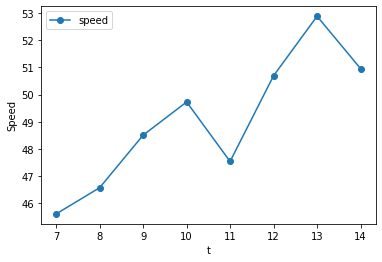

In [107]:
plt.plot(df.t, df.speed, label = 'speed', marker = 'o')
plt.legend()
plt.xlabel('t')
plt.ylabel('Speed')

## Problem 5

In [24]:
def high_dim_diff(fs, pts, h):
    m = len(fs)
    n = len(pts)
    J = np.zeros((m,n))
    I = np.identity(n)
    for i, f in enumerate(fs):
        for j, pt in enumerate(pts):
            fn = sy.lambdify((x, y), f, 'numpy')
            xleft = pt - h * I[:, j]
            xright = pt + h * I[:, j]
            J[i, j] = (fn(xright[0], xright[1]) - fn(xleft[0], xleft[1])) / (2 * h)
    return J

In [25]:
x = sy.symbols('x')
y = sy.symbols('y')
fs = [x ** 2, x ** 3 - y]
pts = [1, 1]
h = 0.01
print(high_dim_diff(fs, pts, h))

[[ 2.      0.    ]
 [ 3.0001 -1.    ]]


## Problem 7

In [14]:
from autograd import numpy as anp
from autograd import grad

g = lambda x: anp.exp(anp.sin(anp.cos(x)))
dg = grad(g)
dg(1.)


-1.2069777039799139

In [15]:
from autograd import elementwise_grad

pts = anp.array([1, 2, 3], dtype=anp.float)
dg = elementwise_grad(g)
g(pts)


array([1.67262669, 0.66748447, 0.43343135])

In [16]:
from sympy import factorial

def taylor_exp(x, tol = .0001):
    res, i, term = 0, 0, x
    while anp.abs(term) > tol:
        term = x ** i / int(factorial(i))
        res, i = res + term, i + 1
    return res

d_exp = grad(taylor_exp)
print(d_exp(2., .1), d_exp(2., .0001))

7.266666666666667 7.388994708994709


/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or ti

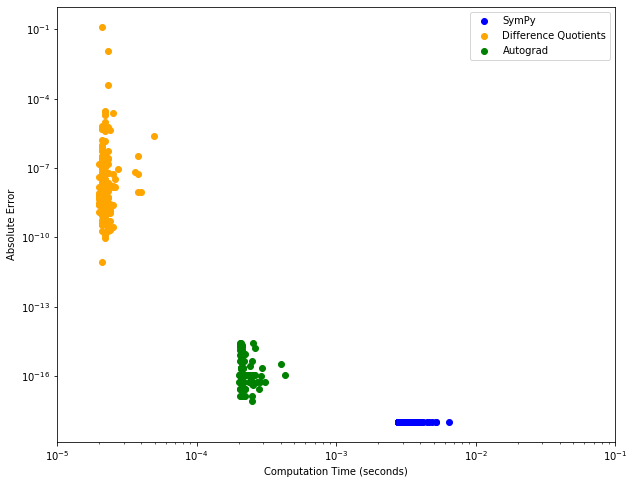

In [34]:
import time
from autograd import numpy as anp
from autograd import grad

def plot_time_vs_err(N):
    T1 = np.zeros(N, dtype='float')
    T2 = np.zeros(N, dtype='float')
    T3 = np.zeros(N, dtype='float')
    E1 = 1e-18 * np.ones(N, dtype='float')
    E2 = np.zeros(N, dtype='float')
    E3 = np.zeros(N, dtype='float')
    dg = grad(lambda x: (anp.sin(x)+1)**(anp.sin(anp.cos(x))))
    
    for i in range(N):
        xp = np.random.uniform(low = -np.pi, high = np.pi)
        t1_st = time.clock()
        rv1 = f_d(xp)
        t1_nd = time.clock()
        T1[i] = t1_nd - t1_st
        
        t2_st = time.clock()
        rv2 = centered_4(f, xp)
        t2_nd = time.clock()
        T2[i] = t2_nd - t2_st
        E2[i] = abs(rv2 - rv1)
        
        
        t3_st = time.clock()
        rv3 = dg(xp)
        t3_nd = time.clock()
        T3[i] = t3_nd - t3_st
        E3[i] = abs(rv3 - rv1)
        
    plt.figure(figsize=(10,8)).gca()
    plt.loglog(T1, E1, 'ro', label='SymPy', color='blue')
    plt.loglog(T2, E2, 'ro', label='Difference Quotients', color='orange')
    plt.loglog(T3, E3, 'ro', label='Autograd', color='green')
    plt.legend()
    plt.xlim([1e-5, 1e-1])
    plt.xlabel('Computation Time (seconds)')
    plt.ylabel('Absolute Error')
    plt.show()


plot_time_vs_err(200)
        